In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
df=pd.read_csv('weatherHistory.csv')
df.sample(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
37039,2010-12-28 07:00:00.000 +0100,Mostly Cloudy,snow,-13.183333,-13.183333,0.91,3.7513,174.0,3.3005,0.0,1025.69,Foggy starting overnight continuing until morn...
30397,2009-07-26 13:00:00.000 +0200,Partly Cloudy,rain,26.111111,26.111111,0.30,14.4900,330.0,9.9820,0.0,1020.80,Partly cloudy starting in the morning continui...
71894,2014-12-02 14:00:00.000 +0100,Overcast,rain,4.838889,2.544444,0.87,9.7244,80.0,9.7083,0.0,1013.32,Foggy in the morning.
87718,2016-04-11 01:00:00.000 +0200,Overcast,rain,10.488889,10.488889,0.80,14.1680,300.0,15.1823,0.0,1010.16,Mostly cloudy until evening.
6922,2006-11-22 11:00:00.000 +0100,Mostly Cloudy,rain,11.133333,11.133333,0.80,24.5203,149.0,11.1251,0.0,1001.48,Mostly cloudy until night.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [19]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [20]:
df.isna().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [21]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [22]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [23]:
df['Precip Type']=df['Precip Type'].fillna('rain')
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [24]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


<AxesSubplot:>

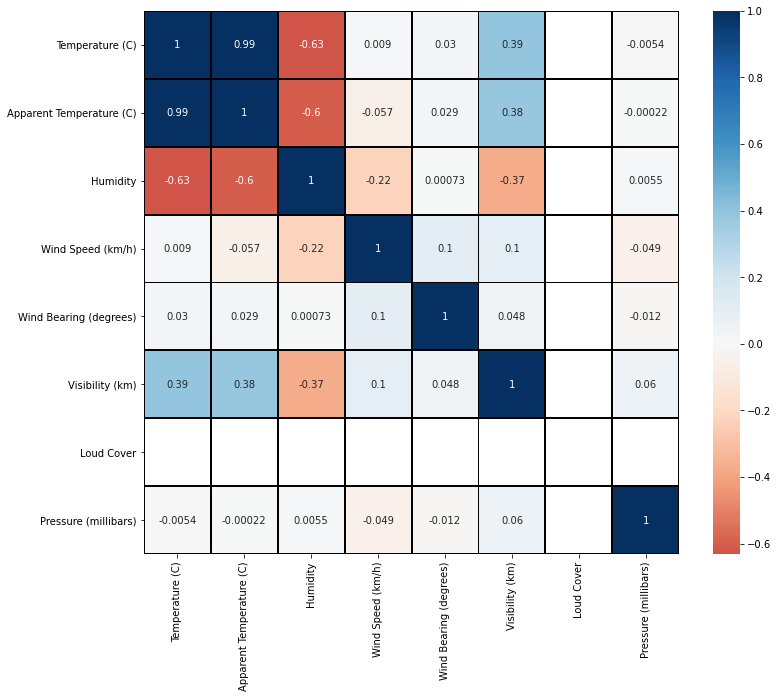

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='RdBu',center=0,linewidths=1,linecolor='black')

In [26]:
df['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [27]:
df=df.drop(['Formatted Date','Loud Cover','Daily Summary','Summary'],axis='columns')
df.sample(5)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
57919,rain,3.872222,1.150000,0.66,10.8192,169.0,9.9820,1026.23
23941,rain,20.716667,20.716667,0.42,5.8926,359.0,11.3988,1020.87
84829,rain,22.927778,22.927778,0.36,4.8944,257.0,15.5526,1023.60
86069,rain,0.077778,0.077778,0.92,0.0000,0.0,0.0161,1025.10
83080,rain,27.288889,26.772222,0.34,12.4131,12.0,16.1000,1024.43


In [28]:
# sns.pairplot(df,hue='Precip Type')

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Temperature (C)',axis=1),df['Temperature (C)'],test_size=0.2)   

In [31]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
model.score(X_test,Y_test)

0.9900487429100825